## Process of conversion from MQL to SQL

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression ## for performing the logistic Regression
from sklearn.metrics import accuracy_score ## to obtain the accuracy score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Abhi'

In [6]:
%cd C:\\Users\\Abhi\\Downloads

C:\Users\Abhi\Downloads


In [7]:
market= pd.read_csv("olist_marketing_qualified_leads_dataset.csv")

In [8]:
market.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [9]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null object
landing_page_id       8000 non-null object
origin                7940 non-null object
dtypes: object(4)
memory usage: 250.1+ KB


According to this data set, they generated 8000 market qualified leads through different mediums.They used different platforms like online, offline etc

In [11]:
value_counts=market['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

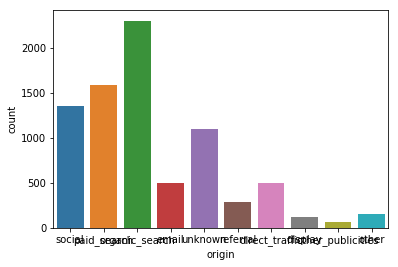

In [12]:
sns.countplot(x='origin',data=market)

From the above data we are able to find that most of the customers are coming throung organic search. Which means company had more 
exposure on the digital platform. As organic search is 44%more than paid search.

So the company which is spending on paid serach giving good retrun over it.Which leads direct search, referral, email etc. 

Through this there are able to 8000 customers.

In the market funnel they are under the category of market qualified lead



## Now going towards SQL

From 2017 to 2018 how many MQL converted into SQL

In [15]:
%pwd


'C:\\Users\\Abhi\\Downloads'

In [16]:
%cd C:\\Users\\Abhi\\Desktop

C:\Users\Abhi\Desktop


In [19]:
market2= pd.read_csv("closed_deal.csv")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

In [20]:
market2.head()

,mql_id,mql_id.1,seller_id,first_contact_date,won_date,origin,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,Price,City,State
0,dac32acd4db4c29c230538b72f8dd87d,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,01-02-18,26-02-18 19:58,social,pet,online_medium,cat,reseller,0,72.19,campinas,SP
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,20-10-17,08-05-18 20:17,paid_search,car_accessories,industry,eagle,reseller,0,259.83,mogi guacu,SP
2,b4bc852d233dfefc5131f593b538befa,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,22-03-18,05-06-18 17:27,organic_search,home_appliances,online_big,cat,reseller,0,216.87,rio de janeiro,RJ
3,6be030b81c75970747525b843c1ef4f8,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,22-01-18,17-01-18 13:51,email,food_drink,online_small,NaN,reseller,0,25.78,sao paulo,SP
4,5420aad7fec3549a85876ba1c529bd84,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,21-02-18,03-07-18 20:17,organic_search,home_appliances,industry,wolf,manufacturer,0,218.04,braganca paulista,SP


In [21]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
mql_id                      842 non-null object
mql_id.1                    842 non-null object
seller_id                   842 non-null object
first_contact_date          842 non-null object
won_date                    842 non-null object
origin                      830 non-null object
business_segment            841 non-null object
lead_type                   836 non-null object
lead_behaviour_profile      665 non-null object
business_type               832 non-null object
declared_monthly_revenue    842 non-null int64
Price                       842 non-null float64
City                        842 non-null object
State                       842 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 92.2+ KB


## Standardization of Data

By removing or filling missing values we can standardized the data.

In [23]:
market.isnull().sum().sum()

206

In [20]:
missing_values= ['?']
market2= pd.read_csv("olist_marketing_qualified_leads_dataset.csv", sep=",", na_values = missing_values)

In [27]:
market2['origin'] = market2['origin'].fillna(market2['origin'].mode()[0])

In [28]:
market2['business_segment'] = market2['business_segment'].fillna(market2['business_segment'].mode()[0])

In [32]:
market2['lead_type'] = market2['lead_type'].fillna(market2['lead_type'].mode()[0])

In [33]:
market2['lead_behaviour_profile'] = market2['lead_behaviour_profile'].fillna(market2['lead_behaviour_profile'].mode()[0])

In [34]:
market2['business_type'] = market2['business_type'].fillna(market2['business_type'].mode()[0])

In [35]:
market2.isnull().sum()

mql_id                      0
mql_id.1                    0
seller_id                   0
first_contact_date          0
won_date                    0
origin                      0
business_segment            0
lead_type                   0
lead_behaviour_profile      0
business_type               0
declared_monthly_revenue    0
Price                       0
City                        0
State                       0
dtype: int64

### 
total 206 missing values in the whole data set.

For filling the missing values, here we will use mode of that same columns. Because all the missing values columns are categoricals.

In [24]:
market2=market2.drop(["mql_id","mql_id.1","seller_id"],axis=1)

In [25]:
market2.columns

Index(['first_contact_date', 'won_date', 'origin', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'business_type',
       'declared_monthly_revenue', 'Price', 'City', 'State'],
      dtype='object')

In [26]:
import datetime

In [44]:
market2['MQL_year'] = pd.DatetimeIndex(market2['first_contact_date']).year


In [43]:
market2['SQL_year'] = pd.DatetimeIndex(market2['won_date']).year


In [31]:
market2['MQL_year'].value_counts()

2018    612
2017    230
Name: MQL_year, dtype: int64

In [32]:
market2['SQL_year'].value_counts()

2018    839
2017    3  
Name: SQL_year, dtype: int64

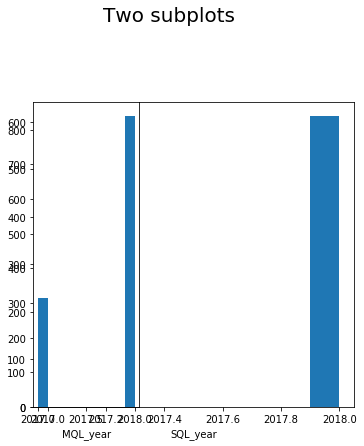

In [36]:
fig = plt.figure(figsize=(8,8))
axl = fig.add_subplot(111)
plt.xlabel('SQL_year')
plt.hist(market2['SQL_year'])

ax2 = fig.add_subplot(121)
plt.xlabel('MQL_year')
plt.hist(market2['MQL_year'])
 
#add an overall title

plt.suptitle('Two subplots', size = 20)

# adjust the spacing between plots

plt.tight_layout(pad=10)

#show plot

plt.show()

In [42]:
market2['SQL_time'] = pd.DatetimeIndex(market2['won_date']).time

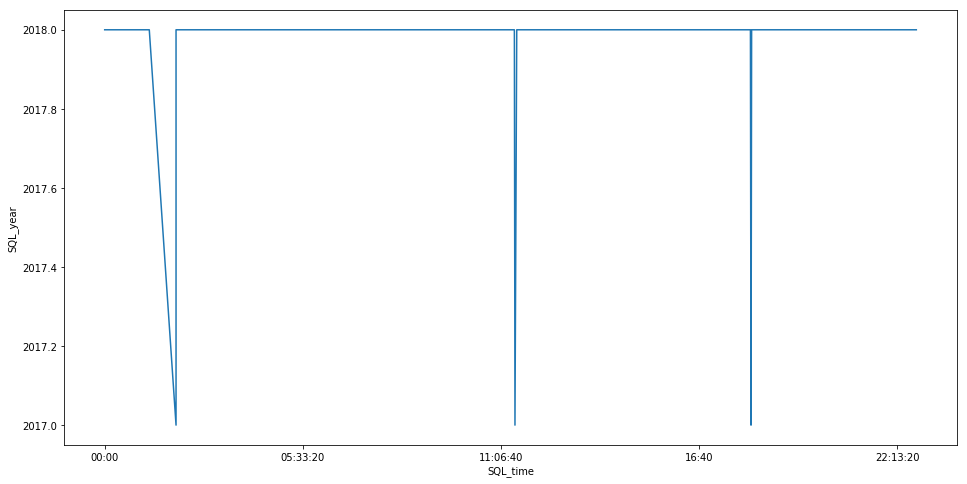

In [41]:
plt.figure(figsize=(16,8))
sns.lineplot(x='SQL_time',y='SQL_year' ,data=market2,estimator=None)

So from the above graph we can conclude that most of the conversion or SQL is happened in the year 2018.

The frequent timing of the purchases is mid night, evening and night through the time variable.


In [59]:
market2['business_type'].value_counts()

reseller        587
manufacturer    242
other           3  
Name: business_type, dtype: int64

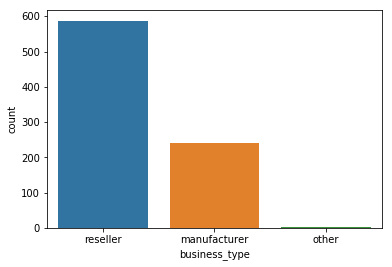

In [60]:
sns.countplot(x='business_type',data=market2)

In [62]:
market2['business_segment'].value_counts()

home_decor                         105
health_beauty                      93 
car_accessories                    77 
household_utilities                71 
construction_tools_house_garden    69 
audio_video_electronics            64 
computers                          34 
pet                                30 
food_supplement                    28 
food_drink                         26 
sports_leisure                     25 
bags_backpacks                     22 
bed_bath_table                     22 
toys                               20 
fashion_accessories                19 
home_office_furniture              14 
phone_mobile                       13 
stationery                         13 
handcrafted                        12 
small_appliances                   12 
baby                               10 
music_instruments                  9  
books                              9  
watches                            8  
jewerly                            8  
home_appliances          

In the business segementation , Home decoration is at top of the list and sellers are resellers more.In the comparision of the 
manufacturers and industry.

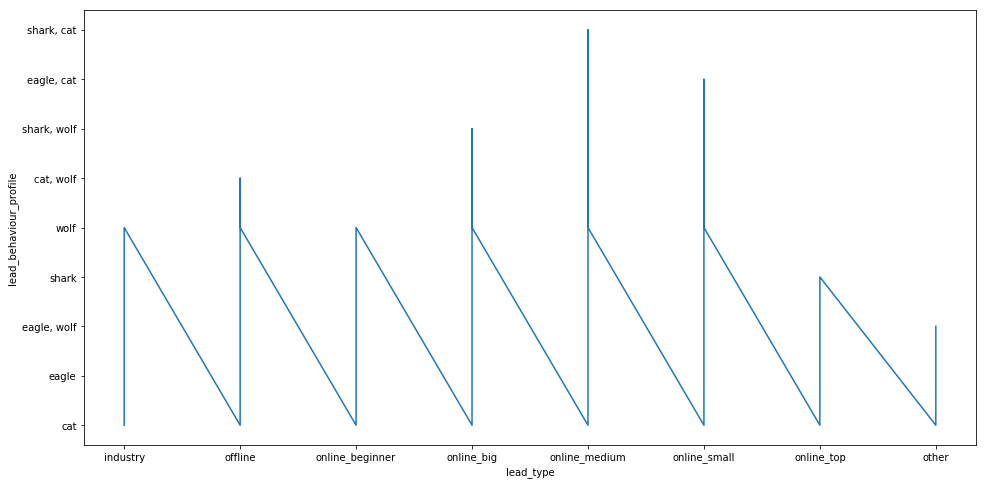

In [63]:
plt.figure(figsize=(16,8))
sns.lineplot(x='lead_type',y='lead_behaviour_profile', data=market2,estimator=None)

Here we have two variables lead type and lead behavior. In this lead behavior profile measuring the speed of lead generation 
to conversions.
in this case, online_medium lead type increases more rapidly. 

Second one is online_ small. Which representing that they are targeting the right audeince on the digital platform.
there is lots of assumptions like animals name representing speed of the conversion or from MQL to SQL.

If customer are entering more from online medium and small platform to inside the funnel.It means on the small platform they are 
selling more customized products.


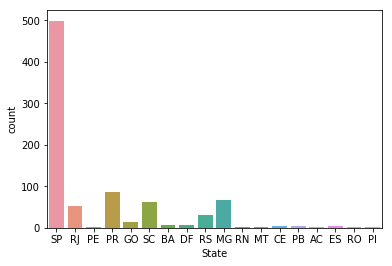

In [77]:
sns.countplot(x='State',data=market2)

In [78]:
market2.columns

Index(['first_contact_date', 'won_date', 'origin', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'business_type',
       'declared_monthly_revenue', 'Price', 'City', 'State', 'MQL_year',
       'SQL_year', 'SQL_time', 'Business_type', 'Business_segment'],
      dtype='object')

In [79]:
market2['revenue_group']=['<0'if x <0
else '1000-100000' if x <100000
else '150000-500000' if x <500000
else '800000=<' for x in market2['declared_monthly_revenue']]

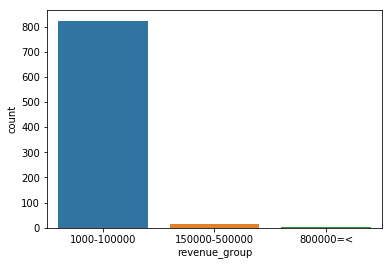

In [81]:
sns.countplot(x='revenue_group',data=market2)

So most of the reseller monthly revenue under the 1000 to 100000 category.